Modelo de rene neural simples com 3 neuronios

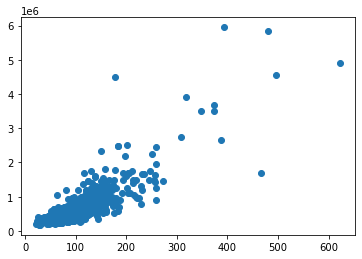

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rand

df = pd.read_csv('dados/house-price.csv')

plt.scatter(x=df['Area'], y=df['Price'])

In [68]:
(
    df[~(
        df
        .Price
        .isna()
        )
        ]
)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


# Primeira versão

-684955.2191824416
-448648.8880147414
-772788.2832626927
-381504.18700520997
-438605.47634957667
-309830.1074806569
-205637.9252829062
-350982.342634634
-238827.10457492384
-188252.50354152493
-302099.5529692448
-217255.29802325938
-216844.85735510374
-298839.9932465039
-292735.42138203717
-12379.10721992189
-249269.39289440966
39523.32440574793
65238.55931348575
-136962.27095166894
-700029.3095644785
-146034.90207279532
100543.97939318325
-72691.12387624558
319354.2894565626
160312.8245537522
174184.60468852287
-101731.05201885477
-378835.541463675
-91865.89831694239
-179281.3441450789
-270635.98056672676
-136738.3061584438
-1589645.4506583465
442064.7838429074
99080.11106636265
190667.25683881738
182559.98913216474
133729.51508982643
1023852.1309247771
130100.04143559904
72482.17414068733
584523.3077701415
44164.720922084234
482865.2656511937
137386.58966614265
219070.99890828202
527636.70491154
238393.78074792598
257890.98574422835
273380.3966522231
320130.95665632724
73911.09531199

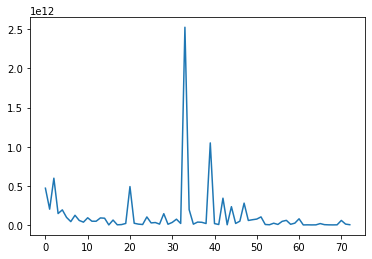

In [69]:
X_train = np.array(df['Area'][:100])
y_train = np.array(df['Price'][:100])
n = len(X_train)

w = rand.random()
b = 0
lr = 0.001
mse = []

for i in range(0, 100):
    pred = (X_train[i] * w) + b
    
    error = pred - y_train[i]
    
    print(error)
    dw = (1/n) * X_train[i] * error
    db = (1/n) * error

    w = w - lr * dw
    b = b - lr * db
    
    mse.append(error ** 2)
    

plt.plot(mse)

# Segunda versão

In [74]:
X_train = (df.loc[~(df.Price.isna())].Area.iloc[:800].values)
y_train = (df.loc[~(df.Price.isna())].Price.iloc[:800].values)

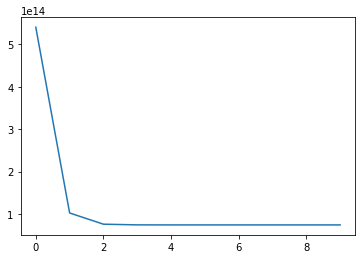

In [93]:
# X_train = np.array(df['Area'][:100])
# y_train = np.array(df['Price'][:100])
n = len(X_train)

w = rand.random()
b = 0
lr = 0.0001
mse = []


for e in range(10):
    pred = (X_train * w) + b
    error = pred - y_train

    dw = (1/n) * X_train.T @ error
    db = (1/n) * np.sum(error)

    w = w - lr * dw
    b = b - lr * db

    mse.append(error @ error)
     

plt.plot(mse)


In [96]:
g = []

for x in range(600):
    g.append(x * w + b)

In [85]:
df.tail()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268
923,924,"S. F. van Ossstraat 334, Amsterdam",1068 JS,300000.0,79,4,4.810678,52.355493


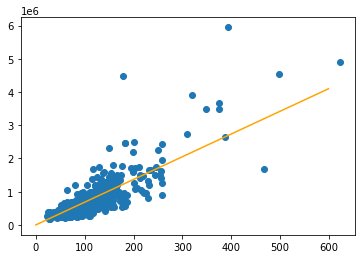

In [108]:
plt.plot(g, color='orange')
plt.scatter(X_train, y_train)
plt.show()
